## Welcome to Telma's Library 


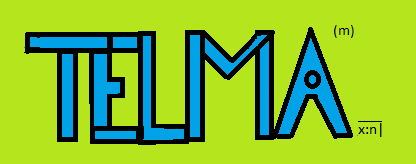

### BiometricModel is a class of Telma.

This class make the basic actuarial table for one cohort or two cohorts either.

##### Using G20 dataset.

Note: this database refers to the G20 countries and that was downloaded from **kaggle**.
Click the following link to obtain it. [Dataset lifeTables](https://www.kaggle.com/cthierfelder/life-table-g20)

In [2]:
import pandas as pd
file = r'C:\Users\Josè Valencia\Desktop\Actuarial2\lifeTable.csv'
dataset = pd.read_csv(file, index_col=0) 
dataset.head()

,Australia_Male,Austria_Male,Belgium_Male,Bulgaria_Male,Canada_Male,Czech Republic_Male,Denmark_Male,Estonia_Male,Finland_Male,France_Male,...,Netherlands_Female,Poland_Female,Portugal_Female,Russia_Female,Slovakia_Female,Slovenia_Female,Spain_Female,Sweden_Female,United Kingdom_Female,United States_Female
age,,,,,,,,,,,,,,,,,,,,,
0,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
1,99528,99600,99620,98938,99488,99698,99689,99582,99740,99586,...,99649,99493,99693,99279,99526,99747,99713,99759,99583,99415
2,99495,99572,99570,98887,99453,99674,99663,99521,99723,99554,...,99624,99461,99657,99205,99486,99727,99682,99735,99558,99376
3,99471,99545,99549,98854,99433,99646,99657,99521,99717,99531,...,99609,99443,99639,99160,99444,99717,99669,99718,99538,99351
4,99458,99528,99528,98795,99421,99637,99654,99521,99707,99513,...,99595,99424,99626,99130,99414,99706,99657,99700,99522,99332


#### Example with "Russia_Female" and "French_Female".

In [3]:
rusas = dataset['Russia_Female']
francesas = dataset['France_Female']

In [5]:
from telma import BiometricModel

## Basic actuarial table  <a id='gringo'></a>

| AGE| COHORT FUNCTION | DEATH |PROBABILTY OF DEATH | PROBABILITY OF LIVING | LX |CENTRAL RATE MORTALITY  | TX|LIFE EXPECTANCY|
|------|----------------------|--------------|---------------------------------------------------|----------------------------------------|---------|--------------|-----------|-----------------
| $x$    | $l(x)$                                   |$d(x)$                                   | $q(x)$                                              | $p(x)$                                   | $Lx$ |$m(x)$|$Tx$ | $e(x)$|

In [6]:
usa_male = dataset['United States_Male']

In [9]:
# USA_MALE TABLE. By passing the parameter we obtain 
BiometricModel().actuarialtable(usa_male) ## e(x) is "curtate"

--------------------------------------------------
Actuarial Table of United States_Male:
--------------------------------------------------
Date and Time:  Sat, 24 Jul 2021 10:29:31
Region and Country:  Liguria , IT
Omega ω :  111


,l(x),dx,qx,px,Lx,Tx,mx,ex curtate
0,100000,716.0,0.007160,0.992840,99642.0,7613388.5,0.007186,75.633870
1,99284,47.0,0.000473,0.999527,99260.5,7513746.5,0.000474,75.179314
2,99237,31.0,0.000312,0.999688,99221.5,7414486.0,0.000312,74.214920
3,99206,24.0,0.000242,0.999758,99194.0,7315264.5,0.000242,73.238111
4,99182,18.0,0.000181,0.999819,99173.0,7216070.5,0.000182,72.255833
...,...,...,...,...,...,...,...,...
106,51,24.0,0.470588,0.529412,39.0,75.0,0.615385,0.941176
107,27,13.0,0.481481,0.518519,20.5,36.0,0.634146,0.777778
108,14,7.0,0.500000,0.500000,10.5,15.5,0.666667,0.500000
109,7,4.0,0.571429,0.428571,5.0,5.0,0.800000,0.000000


#### I can pass more cohorts to the function to have the respective table. Russian and North American example

In [10]:
rusas = dataset.Russia_Female
usa_female = dataset['United States_Female']

In [11]:
BiometricModel().actuarialtable2(rusas, usa_female) # It follows the order lx = Russian, ly = American

----------------------------------------------------------------------
Actuarial Table of Russia_Female and United States_Female:
----------------------------------------------------------------------
Date and Time:  Sat, 24 Jul 2021 10:30:56
Region and Country: Liguria , IT
Omega 1 ω :  111
Omega 2 ω :  111


,l(x),l(y),dx,dy,qx,qy,px,py,Lx,Ly,Tx,Ty,mx,my,ex,ey
0,100000,100000,721.0,585.0,0.007210,0.005850,0.992790,0.994150,99639.5,99707.5,7469927.5,8103792.0,0.007236,0.005867,74.199270,80.537840
1,99279,99415,74.0,39.0,0.000745,0.000392,0.999255,0.999608,99242.0,99395.5,7370288.0,8004084.5,0.000746,0.000392,73.738132,80.011759
2,99205,99376,45.0,25.0,0.000454,0.000252,0.999546,0.999748,99182.5,99363.5,7271046.0,7904689.0,0.000454,0.000252,72.793135,79.043159
3,99160,99351,30.0,19.0,0.000303,0.000191,0.999697,0.999809,99145.0,99341.5,7171863.5,7805325.5,0.000303,0.000191,71.826170,78.063049
4,99130,99332,31.0,15.0,0.000313,0.000151,0.999687,0.999849,99114.5,99324.5,7072718.5,7705984.0,0.000313,0.000151,70.847907,77.077981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,14,198,7.0,86.0,0.500000,0.434343,0.500000,0.565657,10.5,155.0,19.5,312.0,0.666667,0.554839,0.857143,1.035354
107,7,112,4.0,51.0,0.571429,0.455357,0.428571,0.544643,5.0,86.5,9.0,157.0,0.800000,0.589595,0.714286,0.830357
108,3,61,1.0,29.0,0.333333,0.475410,0.666667,0.524590,2.5,46.5,4.0,70.5,0.400000,0.623656,0.666667,0.524590
109,2,32,1.0,16.0,0.500000,0.500000,0.500000,0.500000,1.5,24.0,1.5,24.0,0.666667,0.666667,0.000000,0.000000


# Evaluating a different cohort with different length

### The dummy model

###### The model will be specified as:
$$F(X) = 1- e^{-0.0001x^{e^{x/115}}}$$


$$S(X) = 1-F(X)= e^{-0.0001x^{e^{x/115}}}$$

$Clearly:$

  \begin{equation}
   1- S(X) = F(X)=
    \begin{cases}
      0, & \text{if}\ x < 0 \\
      1 - e^{-0.0001x^{e^{x/115}}}, & \text{if}\ 0 \le X < 115\\
      1, & \text{if}\ x \geq\ 115
    \end{cases}
  \end{equation}
$F(115) = 1$ if $1 - e^{(-0.0001 \cdot 115^{e^{(115/115)}})}.$ Consequently: $S(115) = 0$.

In [14]:
import numpy as np
def vettore(): # the fictious model
    x = np.arange(0,115)
    numera = np.exp(-.0001*x**(np.exp(x/115)))
    l = pd.Series(numera*10**5)
    vettore = l[0:-8].round()
    return vettore
modelo = vettore()
modelo # Age and livings of the model

0      100000.0
1       99990.0
2       99980.0
3       99969.0
4       99958.0
         ...   
102        54.0
103        20.0
104         7.0
105         2.0
106         0.0
Length: 107, dtype: float64

##### Notice that omega $\omega$ is when the cohort desappear

In [16]:
BiometricModel().actuarialtable2(francesas,modelo) # French and Dummy model

----------------------------------------------------------------------
Actuarial Table of France_Female and None:
----------------------------------------------------------------------
Date and Time:  Sat, 24 Jul 2021 10:35:03
Region and Country: Liguria , IT
Omega 1 ω :  111
Omega 2 ω :  106


,l(x),l(y),dx,dy,qx,qy,px,py,Lx,Ly,Tx,Ty,mx,my,ex,ey
0,100000,100000,336.0,10.0,0.003360,0.00010,0.996640,0.99990,99832.0,99995.0,8444605.0,7789332.0,0.003366,0.00010,83.945990,77.393320
1,99664,99990,26.0,10.0,0.000261,0.00010,0.999739,0.99990,99651.0,99985.0,8344773.0,7689337.0,0.000261,0.00010,83.228999,76.401060
2,99638,99980,19.0,11.0,0.000191,0.00011,0.999809,0.99989,99628.5,99974.5,8245122.0,7589352.0,0.000191,0.00011,82.250718,75.408702
3,99619,99969,12.0,11.0,0.000120,0.00011,0.999880,0.99989,99613.0,99963.5,8145493.5,7489377.5,0.000120,0.00011,81.266405,74.416999
4,99607,99958,11.0,12.0,0.000110,0.00012,0.999890,0.99988,99601.5,99952.0,8045880.5,7389414.0,0.000110,0.00012,80.276195,73.425189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,194,0,91.0,0.0,0.469072,1.00000,0.530928,0.00000,148.5,0.0,284.0,0.0,0.612795,NaN,0.932990,0.000000
107,103,0,51.0,0.0,0.495146,1.00000,0.504854,0.00000,77.5,0.0,135.5,0.0,0.658065,NaN,0.757282,0.000000
108,52,0,26.0,0.0,0.500000,1.00000,0.500000,0.00000,39.0,0.0,58.0,0.0,0.666667,NaN,0.500000,0.000000
109,26,0,14.0,0.0,0.538462,1.00000,0.461538,0.00000,19.0,0.0,19.0,0.0,0.736842,NaN,0.000000,0.000000


### Calculating Omega of one or two cohorts

In [17]:
BiometricModel().omega(rusas,modelo)  ## Omega can evaluate two cohorts

(111, 106)

In [18]:
BiometricModel().omega(modelo)  # likewise Omega can evaluate one cohort

106

In [19]:
BiometricModel().omega(usa_male)

111

In [20]:
len(usa_male), len(modelo) #len is length. Is is length in R

(111, 107)

#### Note que no es del todo trivial en cuanto la longitud de lx puede no ser la misma. <br>De hecho el modelo fake que plantee tiene longitud 107, pero de hecho en 106 que la coorte desaparece. (inf_actuarial) <br>Por otro lado la longitudad de rusas tambien es 111 pero de hecho a la edad 110 hay aùn una mujer, por lo que el infinito actuarial es 111.

#### Calculation of probabilities such as life expectancy.
##### It can be calculated if it is curtate or complete. By default it is complete. <br>
Example.

In [21]:
BiometricModel().life_expectancy(usa_male, age=0, kind ='complete') # Complete life expectancy at birth for a usa_male

76.13

In [22]:
BiometricModel().life_expectancy(usa_male, age=0, kind ='curtate') # Curtate life expectancy at birth for a usa_male

75.63

[Usa_male](#gringo) click here to return to the American male table and check results with the actuarial table.

In [28]:
BiometricModel().Tx(usa_male, age=1)

7513746.5

In [30]:
BiometricModel().Lx(usa_male, age=4)

99173.0

In [31]:
BiometricModel().central_rate_mortality(usa_female, age=2)

0.0002516

### Calculating Probabilities with OneLife and MultipleLives

In [34]:
from telma import MultipleLives, OneLife

### Una cohorte

In [35]:
OneLife().p_x(francesas, age=23)

The probability that 23 will survive within 1 is:


0.9997483441042057

In [36]:
OneLife().p_x(francesas, age=23, t=10)

The probability that 23 will survive within 10 is:


0.9968694006563186

In [37]:
OneLife().p_x(francesas, age=23, t=30, capital = 100000, lump_sum=True) ## Is can calculate lump sump

The life insurance to pay is:


(53561.02, 0.5356102381659709)

In [53]:
italia = pd.read_csv('italiani.csv').x  ## Old italian cohort sim92
italia

0      100000.0
1       99112.0
2       99061.0
3       99025.0
4       98997.0
         ...   
104        28.0
105        13.0
106         6.0
107         2.0
108         1.0
Name: x, Length: 109, dtype: float64

In [50]:
OneLife().p_x(italia, age=23, t=30, capital = 100000, lump_sum=True) ## It can calculate lump sump if True

The life insurance to pay is:


(51575.35, 0.5157534761499296)

### Joint Probabilities

|Function|Notation|The story|
|-----|----------------|-------|
|p_xy|$p_{xy}$ = $p_x \cdot p_y$| Both survive|
|q_xy|$q_{xy}$= $q_x \cdot p_y+ q_y \cdot p_x$ + $q_x \cdot q_y$|At least one die|
|extinction|$q_\bar{{xy}}$=$q_x \cdot q_y$|Nobody survive|
|no extinction|$p_{\bar{xy}}$|At least one survive|
|dissolution_no_ex|$p_{\frac{[1]}{xy}}$=$p_x \cdot q_y +q_x \cdot p_y $|It survive exactly one|

In [43]:
MultipleLives().q_xy(usa_male, usa_female, age_x=60, age_y=63, t=3) # qxyt status = 'joint' en R --joint_life

The probability that at least one of lives 60 and 63 will be dead within 3 years is:


0.06256902018899291

In [43]:
MultipleLives().extinction(usa_male, usa_female, age_x=60, age_y=63, t=3) # qxyt status = 'last' en R --last_survivor

The probability that both lives 60 and 63 will be dead within 3 years is: 


0.000994521015274752

In [44]:
MultipleLives().no_extinction(usa_male, usa_female, age_x=60, age_y=63, t=3) # qxyt status = 'last' en R --last_survivor

The probability that at least one of lives 60 and 63 will be alive after 3 years is:


0.9990054789847252

In [45]:
MultipleLives().p_xy(usa_male, usa_female, age_x=60, age_y=63, t=3) # pxyt status = 'joint' en R

The probability that both lives 60 and 63 will be alive after 3 years is:


0.9374309798110071

In [47]:
MultipleLives().dissolution_no_ex(usa_male, usa_female, age_x=60, age_y=63, t=3) # sobrevive exactamente 1

0.061574499173718156

In [52]:
0.06256902018899291 - 0.000994521015274752 # That is dissoltion and no extinction

0.061574499173718156

In [46]:
MultipleLives().p_xy(italia, italia, age_x=22, age_y=44, t=6)

The probability that both lives 22 and 44 will be alive after 6 years is:


0.9728491313971115

In [50]:
MultipleLives().q_xy(italia, italia, age_x=20, age_y=22, t=3) # pxyt status = 'joint' en R

The probability that at least one of lives 20 and 22 will be dead within 3 years is:


0.007177736364576526

## References

*  Ayuso, Mercedes; Guillen Estany, Montserrat; Rojo García, José Luis; Pérez Marín, Ana Maria. Estadistica actuarial vida
